# Regresión Lineal Multivariable

### 1) Se importan las librerías con las que se va a trabajar y se carga el dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics as ms
from scipy.stats import shapiro
import seaborn as sns
sns.set()

In [2]:
!wget https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv

--2022-09-12 01:15:35--  https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54288 (53K) [text/plain]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  53.02K  --.-KB/s    in 0.002s  

2022-09-12 01:15:35 (24.1 MB/s) - ‘insurance.csv’ saved [54288/54288]



In [3]:
data = pd.read_csv('insurance.csv');
data_fix = data.drop(columns=['sex', 'smoker','region'])
data_fix


,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


### 2) Se eligen las variables.

In [4]:
X = data_fix[['age', 'bmi', 'children']].to_numpy()
y = data_fix['charges'].to_numpy()
print(f"X ('age', 'bmi', 'children') tiene la forma: {X.shape} | posee la cantidad de datos: {len(X)}")
print(f"y ('charges') tiene la forma {y.shape} | posee la cantidad de datos {len(y)}")

X ('age', 'bmi', 'children') tiene la forma: (1338, 3) | posee la cantidad de datos: 1338
y ('charges') tiene la forma (1338,) | posee la cantidad de datos 1338


### 3) Se analiza el dataset

In [5]:
normalidad_X_age = shapiro(X[:,0])
normalidad_X_bmi = shapiro(X[:,1])
normalidad_X_children = shapiro(X[:,2])
normalidad_y = shapiro(y)
print(f"normalidad_X_age {normalidad_X_age}")
print(f"normalidad_X_bmi {normalidad_X_bmi}")
print(f"normalidad_X_children {normalidad_X_children}")
print(f"normalidad_y {normalidad_y}")

normalidad_X_age ShapiroResult(statistic=0.9446991682052612, pvalue=5.687479624670986e-22)
normalidad_X_bmi ShapiroResult(statistic=0.9938876032829285, pvalue=2.609841976664029e-05)
normalidad_X_children ShapiroResult(statistic=0.8231803774833679, pvalue=5.066361280494088e-36)
normalidad_y ShapiroResult(statistic=0.814687967300415, pvalue=1.150477698013898e-36)


Todas las variables independientes son normales porque su pvalue es mayor a 0.05. Entonces, podemos interpretar la correlación a través del coeficiente de Pearson.

Text(0.5, 1.0, 'Distribución de y["charges"]')

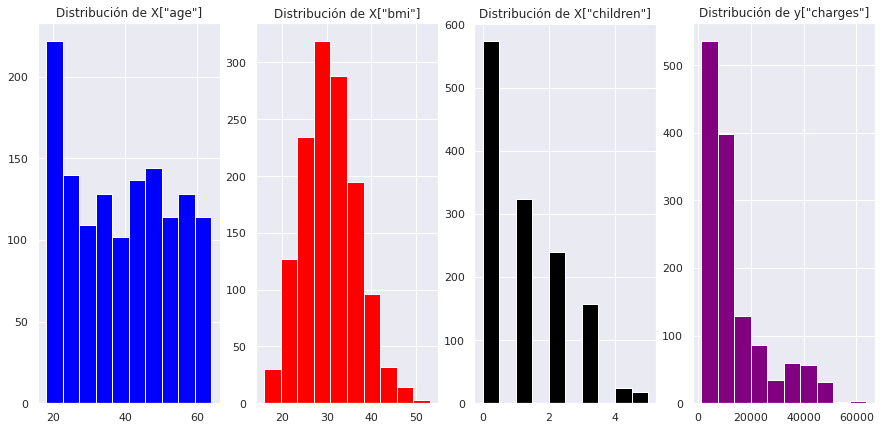

In [6]:
plt.figure(figsize=(15,7))
plt.subplot(1,4,1)
plt.hist(X[:,0], color='blue', density=False)
plt.title('Distribución de X["age"]')
plt.subplot(1,4,2)
plt.hist(X[:,1], color='red', density=False)
plt.title('Distribución de X["bmi"]')
plt.subplot(1,4,3)
plt.hist(X[:,2],color='black', density=False)
plt.title('Distribución de X["children"]')
plt.subplot(1,4,4)
plt.hist(y, color='purple', density=False)
plt.title('Distribución de y["charges"]')


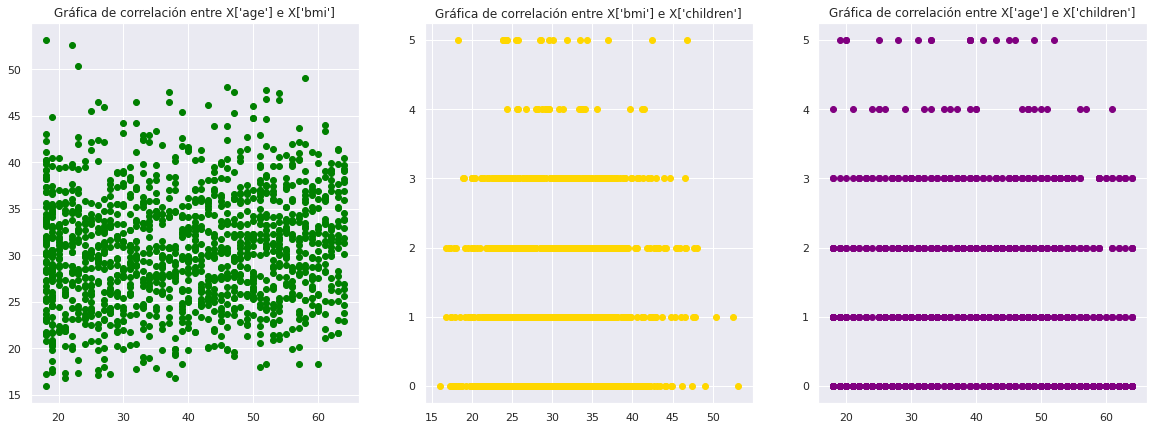

In [7]:
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
plt.scatter(X[:,0],X[:,1],color='green')
plt.title("Gráfica de correlación entre X['age'] e X['bmi']")
plt.subplot(1,3,2)
plt.scatter(X[:,1],X[:,2],color='gold')
plt.title("Gráfica de correlación entre X['bmi'] e X['children']")
plt.subplot(1,3,3)
plt.scatter(X[:,0],X[:,2],color='purple')
plt.title("Gráfica de correlación entre X['age'] e X['children']");

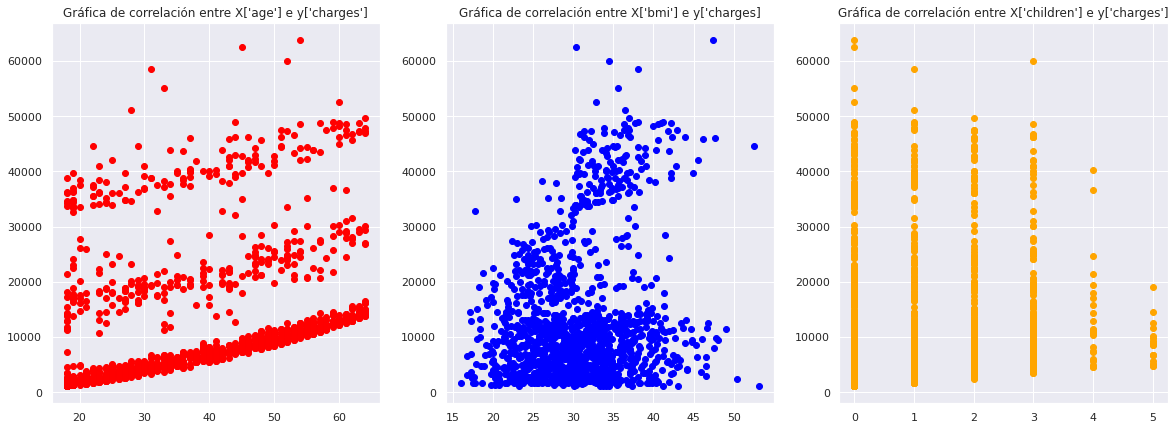

In [8]:
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
plt.scatter(X[:,0],y,color='red')
plt.title("Gráfica de correlación entre X['age'] e y['charges']")
plt.subplot(1,3,2)
plt.scatter(X[:,1],y,color='blue')
plt.title("Gráfica de correlación entre X['bmi'] e y['charges]")
plt.subplot(1,3,3)
plt.scatter(X[:,2],y,color='orange')
plt.title("Gráfica de correlación entre X['children'] e y['charges']");

Text(0.5, 1.0, 'Mapa de correlación ente las variables')

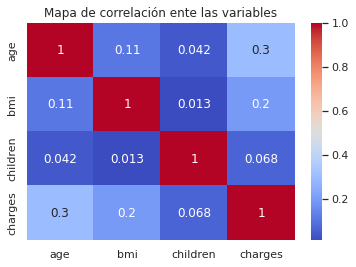

In [9]:
sns.heatmap(data_fix.corr(), cmap='coolwarm', annot=True)
plt.title('Mapa de correlación ente las variables')

###4) Se transforman los datos.

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [11]:
X_transformed = scaler.fit_transform(X)
print(f"X transformed: {X_transformed.shape}")
X_transformed

X transformed: (1338, 3)


array([[0.02173913, 0.3212268 , 0.        ],
       [0.        , 0.47914985, 0.2       ],
       [0.2173913 , 0.45843422, 0.6       ],
       ...,
       [0.        , 0.56201238, 0.        ],
       [0.06521739, 0.26472962, 0.        ],
       [0.93478261, 0.35270379, 0.        ]])

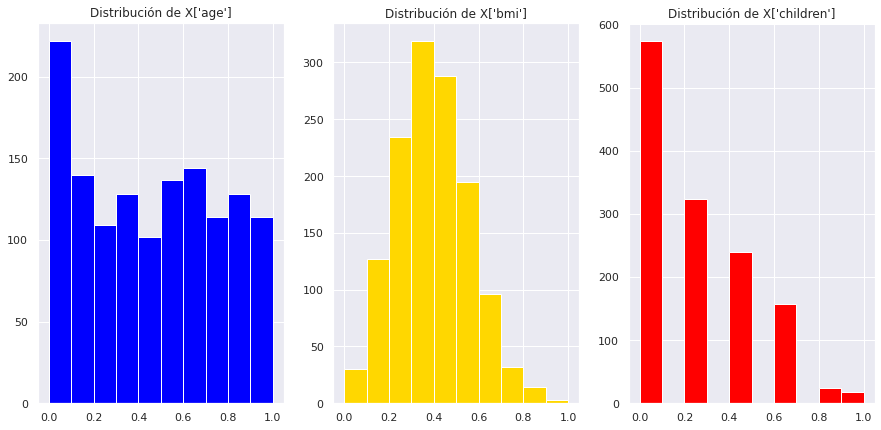

In [12]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.hist(X_transformed[:,0],color='blue',density=False)
plt.title("Distribución de X['age']")
plt.subplot(1,3,2)
plt.hist(X_transformed[:,1],color='gold',density=False)
plt.title("Distribución de X['bmi']");
plt.subplot(1,3,3)
plt.hist(X_transformed[:,2],color='red',density=False)
plt.title("Distribución de X['children']");

###5) Se separa el dataset transformado en entrenamiento y testeo


In [13]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_transformed, y , test_size=0.25, random_state=42)

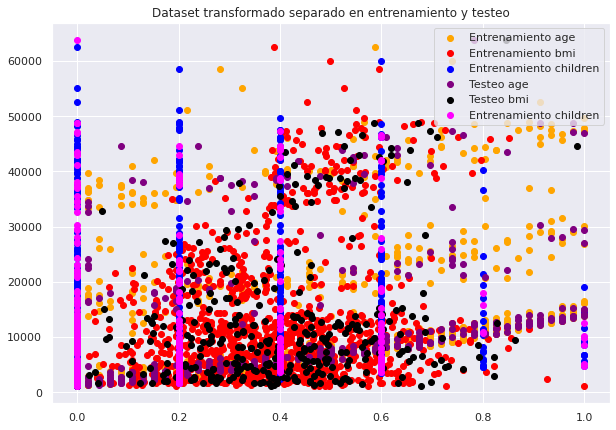

In [14]:
plt.figure(figsize=(10,7))
plt.scatter(Xtrain[:,0],ytrain,c='orange',label='Entrenamiento age')
plt.scatter(Xtrain[:,1],ytrain,c='red',label='Entrenamiento bmi')
plt.scatter(Xtrain[:,2],ytrain,c='blue',label='Entrenamiento children')
plt.scatter(Xtest[:,0],ytest,c='purple',label='Testeo age')
plt.scatter(Xtest[:,1],ytest,c='black',label='Testeo bmi')
plt.scatter(Xtest[:,2],ytest,c='magenta',label='Entrenamiento children')
plt.legend()
plt.title("Dataset transformado separado en entrenamiento y testeo");

### 6) Se entrena el modelo de regresión múltiple.

In [15]:
multilinear_model = LinearRegression()
multilinear_model.fit(Xtrain, ytrain)


LinearRegression()

In [16]:
print(f"y = {multilinear_model.coef_[0]}*X0 + {multilinear_model.coef_[1]}*X1 + {multilinear_model.coef_[2]}*X2 + {multilinear_model.intercept_}")

y = 10715.462923284282*X0 + 12354.673104316807*X1 + 3273.9980146284715*X2 + 2756.5276152803417


### 7) Se evalúa el modelo lineal

In [17]:
print(f"Valor de bondad de ajuste del conjunto de entrenamiento: {multilinear_model.score(Xtrain, ytrain)}")
print(f"Valor de bondad de ajuste del conjunto de testeo: {multilinear_model.score(Xtest, ytest)}")

Valor de bondad de ajuste del conjunto de entrenamiento: 0.11732982143345816
Valor de bondad de ajuste del conjunto de testeo: 0.12733318587824716


In [18]:
y_train_m_predict = multilinear_model.predict(Xtrain)
y_test_m_predict = multilinear_model.predict(Xtest)


In [21]:
from sklearn import metrics as model_selection
test_mae = ms.mean_absolute_error(y_true = ytest, y_pred = y_test_m_predict)
train_mae = ms.mean_absolute_error(y_true = ytrain, y_pred = y_train_m_predict)
test_mse = ms.mean_squared_error(y_true = ytest, y_pred = y_test_m_predict)
train_mse = ms.mean_squared_error(y_true = ytrain, y_pred = y_train_m_predict)
print(f"Valor de métrica MAE con el conjunto de testeo: {test_mae}")
print(f"Valor de métrica MAE con el conjunto de entrenamiento: {train_mae}\n")
print(f"Valor de métrica MSE con el conjunto de testeo: {test_mse}")
print(f"Valor de métrica MSE con el conjunto de entrenamiento: {train_mse}")

Valor de métrica MAE con el conjunto de testeo: 9181.554834229102
Valor de métrica MAE con el conjunto de entrenamiento: 8971.796717980526

Valor de métrica MSE con el conjunto de testeo: 131677690.16518272
Valor de métrica MSE con el conjunto de entrenamiento: 128066963.82052587


In [22]:
print(f"Charges maximo: {y.max()} | Charges minimo: {y.min()} | Charges promedio: {y.mean()} | Varianza de los datos de entrada X: {X.var()}")


Charges maximo: 63770.42801 | Charges minimo: 1121.8739 | Charges promedio: 13270.422265141257 | Varianza de los datos de entrada X: 345.2688329779333


In [44]:
error_train = []
for i,j in zip(ytrain,y_train_m_predict):
  print(f"{i} vs {j:.2f} --> diferencia = {(i-j):.2f} --> error de entrenamiento: {(int(i-j)/i)*100:.2f}%")
  error_train.append(abs((int(i-j)/i)*100))

2352.96845 vs 6711.88 --> diferencia = -4358.91 --> error de entrenamiento: -185.21%
4340.4409 vs 9902.22 --> diferencia = -5561.77 --> error de entrenamiento: -128.12%
9391.346 vs 18989.28 --> diferencia = -9597.93 --> error de entrenamiento: -102.19%
42211.1382 vs 16854.27 --> diferencia = 25356.87 --> error de entrenamiento: 60.07%
8823.279 vs 14889.62 --> diferencia = -6066.34 --> error de entrenamiento: -68.75%
14256.1928 vs 16649.29 --> diferencia = -2393.10 --> error de entrenamiento: -16.79%
7133.9025 vs 10051.23 --> diferencia = -2917.33 --> error de entrenamiento: -40.89%
5312.16985 vs 10492.20 --> diferencia = -5180.03 --> error de entrenamiento: -97.51%
3906.127 vs 9954.57 --> diferencia = -6048.44 --> error de entrenamiento: -154.83%
2203.47185 vs 7461.41 --> diferencia = -5257.94 --> error de entrenamiento: -238.58%
28340.18885 vs 13584.73 --> diferencia = 14755.46 --> error de entrenamiento: 52.06%
5484.4673 vs 12161.86 --> diferencia = -6677.39 --> error de entrenamient

In [45]:
print(f"El error promedio de las predicciones con el conjunto de entrenamiento es: {sum(error_train)/len(error_train):.2f}%")

El error promedio de las predicciones con el conjunto de entrenamiento es: 113.33%


In [47]:
error_test = []
for i,j in zip(ytest,y_test_m_predict):
  print(f"{i} vs {j:.2f} --> diferencia = {(i-j):.2f} --> error de testeo: {(int(i-j)/i)*100:.2f}%")
  error_test.append(abs((int(i-j)/i)*100))

9095.06825 vs 13418.55 --> diferencia = -4323.48 --> error de testeo: -47.53%
5272.1758 vs 11622.84 --> diferencia = -6350.66 --> error de testeo: -120.44%
29330.98315 vs 17103.27 --> diferencia = 12227.71 --> error de testeo: 41.69%
9301.89355 vs 14495.75 --> diferencia = -5193.86 --> error de testeo: -55.83%
33750.2918 vs 8294.30 --> diferencia = 25455.99 --> error de testeo: 75.42%
4536.259 vs 16092.84 --> diferencia = -11556.58 --> error de testeo: -254.75%
2117.33885 vs 5168.24 --> diferencia = -3050.90 --> error de testeo: -144.05%
14210.53595 vs 20766.13 --> diferencia = -6555.60 --> error de testeo: -46.13%
3732.6251 vs 5528.05 --> diferencia = -1795.42 --> error de testeo: -48.09%
10264.4421 vs 16173.45 --> diferencia = -5909.01 --> error de testeo: -57.57%
18259.216 vs 10321.58 --> diferencia = 7937.64 --> error de testeo: 43.47%
7256.7231 vs 14286.62 --> diferencia = -7029.90 --> error de testeo: -96.86%
3947.4131 vs 10504.10 --> diferencia = -6556.69 --> error de testeo: -1

In [48]:
print(f"El error promedio de las predicciones con el conjunto de testeo es: {sum(error_test)/len(error_test):.2f}%")

El error promedio de las predicciones con el conjunto de testeo es: 117.78%


# Regresión SVR

### 1) Con el dataset ya cargado, corregido con las varibles numéricas, separado en entrenamiento y testeo, y normalizado,se entrena ahora el SVR.

In [26]:
from sklearn.svm import SVR
svr = SVR(C=6.5, epsilon=0.5, degree=1)
svr.fit(Xtrain, ytrain)

SVR(C=6.5, degree=1, epsilon=0.5)

In [27]:
svr.get_params()

{'C': 6.5,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 1,
 'epsilon': 0.5,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### 2) Se evalua el SVR

In [28]:
print(f"Valor de la bondad de ajuste R2 con el conjunto de entrenamiento: {svr.score(Xtrain,ytrain)}")
print(f"Valor de la bondad de ajuste R2 con el conjunto de testeo: {svr.score(Xtest,ytest)}")

Valor de métrica R2 con el conjunto de entrenamiento: -0.09989563516514921
Valor de métrica R2 con el conjunto de testeo: -0.0971443905597511


In [29]:
y_test_svr_pred = svr.predict(Xtest)
y_train_svr_pred = svr.predict(Xtrain) 
y_test_svr_pred.shape, y_train_svr_pred.shape

((335,), (1003,))

In [31]:
from sklearn import metrics as ms 
test_mae = ms.mean_absolute_error(y_true = ytest, y_pred = y_test_svr_pred) 
train_mae = ms.mean_absolute_error(y_true = ytrain, y_pred = y_train_svr_pred) 
test_mse = ms.mean_squared_error(y_true = ytest, y_pred = y_test_svr_pred) 
train_mse = ms.mean_squared_error(y_true = ytrain, y_pred = y_train_svr_pred)
print(f"Valor de métrica MAE con el conjunto de testeo: {test_mae}")
print(f"Valor de métrica MAE con el conjunto de entrenamiento: {train_mae}\n")
print(f"Valor de métrica MSE con el conjunto de testeo: {test_mse}")
print(f"Valor de métrica MSE con el conjunto de entrenamiento: {train_mse}")

Valor de métrica MAE con el conjunto de testeo: 8197.291232296717
Valor de métrica MAE con el conjunto de entrenamiento: 8001.663093024674

Valor de métrica MSE con el conjunto de testeo: 165549367.5120308
Valor de métrica MSE con el conjunto de entrenamiento: 159584290.86593464


In [42]:
error_train = []
for i,j in zip(ytrain,y_train_svr_pred):
  print(f"{i} vs {j:.2f} --> diferencia = {(i-j):.2f} --> error de entrenamiento: {(int(i-j)/i)*100:.2f}%")
  error_train.append(abs((int(i-j)/i)*100))

2352.96845 vs 8342.06 --> diferencia = -5989.09 --> error de entrenamiento: -254.53%
4340.4409 vs 8435.45 --> diferencia = -4095.01 --> error de entrenamiento: -94.35%
9391.346 vs 9580.27 --> diferencia = -188.92 --> error de entrenamiento: -2.00%
42211.1382 vs 9358.17 --> diferencia = 32852.97 --> error de entrenamiento: 77.83%
8823.279 vs 9250.52 --> diferencia = -427.24 --> error de entrenamiento: -4.84%
14256.1928 vs 9891.65 --> diferencia = 4364.55 --> error de entrenamiento: 30.61%
7133.9025 vs 8801.97 --> diferencia = -1668.07 --> error de entrenamiento: -23.38%
5312.16985 vs 8686.53 --> diferencia = -3374.36 --> error de entrenamiento: -63.51%
3906.127 vs 8678.72 --> diferencia = -4772.60 --> error de entrenamiento: -122.17%
2203.47185 vs 8365.73 --> diferencia = -6162.26 --> error de entrenamiento: -279.65%
28340.18885 vs 9150.26 --> diferencia = 19189.92 --> error de entrenamiento: 67.71%
5484.4673 vs 8643.40 --> diferencia = -3158.94 --> error de entrenamiento: -57.58%
1622.

In [38]:
print(f"El error promedio de las predicciones con el conjunto de entrenamiento es: {sum(error_train)/len(error_train):.2f}%")

El error promedio de las predicciones con el conjunto de entrenamiento es: 90.33%


In [43]:
error_test = []
for i,j in zip(ytest,y_test_svr_pred):
  print(f"{i} vs {j:.2f} --> diferencia = {(i-j):.2f} --> error de testeo: {(int(i-j)/i)*100:.2f}%")
  error_test.append(abs((int(i-j)/i)*100))

9095.06825 vs 9154.91 --> diferencia = -59.84 --> error de testeo: -0.65%
5272.1758 vs 8575.83 --> diferencia = -3303.66 --> error de testeo: -62.65%
29330.98315 vs 9902.08 --> diferencia = 19428.90 --> error de testeo: 66.24%
9301.89355 vs 9239.42 --> diferencia = 62.48 --> error de testeo: 0.67%
33750.2918 vs 8357.77 --> diferencia = 25392.52 --> error de testeo: 75.23%
4536.259 vs 8739.79 --> diferencia = -4203.53 --> error de testeo: -92.65%
2117.33885 vs 8429.76 --> diferencia = -6312.42 --> error de testeo: -298.11%
14210.53595 vs 9875.75 --> diferencia = 4334.79 --> error de testeo: 30.50%
3732.6251 vs 8558.46 --> diferencia = -4825.84 --> error de testeo: -129.27%
10264.4421 vs 9394.28 --> diferencia = 870.17 --> error de testeo: 8.48%
18259.216 vs 8719.92 --> diferencia = 9539.30 --> error de testeo: 52.24%
7256.7231 vs 8934.14 --> diferencia = -1677.42 --> error de testeo: -23.11%
3947.4131 vs 8268.16 --> diferencia = -4320.75 --> error de testeo: -109.44%
46151.1245 vs 9274.

In [40]:
print(f"El error promedio de las predicciones con el conjunto de testeo es: {sum(error_test)/len(error_test):.2f}%")

El error promedio de las predicciones con el conjunto de testeo es: 92.21%
